<a href="https://colab.research.google.com/github/jackevansadl/CHEM3630/blob/main/workshop3-exemplar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is an example to define the molecules CO2 and CO. Optimise them and compute the vibrational modes.




First we need to install the DFT codes (this will take a few minutes)

In [10]:
!pip install -q condacolab

In [11]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [1]:
! mamba install -c anaconda intel-openmp --quiet
! mamba install -c psi4 psi4 --quiet
! pip install -q ase

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.5 MB/s eta 0:00:00


### Instructions
Use the __ase.build.molecule__ routine to create models of the acids and delete one atom to create the congugate base. 

[[ 0.        0.        0.      ]
 [ 0.        0.        1.178658]
 [ 0.        0.       -1.178658]]
[6 8 8]
CO2


<Axes: >

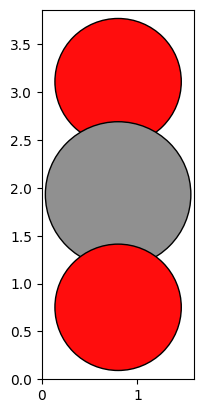

In [19]:
from ase.build import molecule
from ase import Atoms
from ase.visualize.plot import plot_atoms

CO2 = molecule('CO2')
print(CO2.get_positions())
print(CO2.get_atomic_numbers())
print(CO2.get_chemical_formula())
plot_atoms(CO2, rotation=('90x,0y,0z'))


[[ 0.        0.        0.      ]
 [ 0.        0.       -1.178658]]
[6 8]
CO


<Axes: >

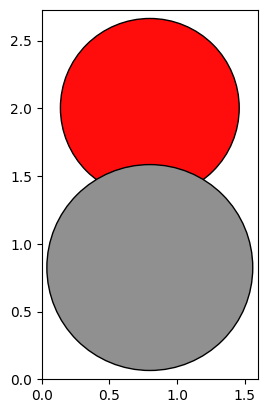

In [21]:
CO = molecule('CO2')
del CO[1]
print(CO.get_positions())
print(CO.get_atomic_numbers())
print(CO.get_chemical_formula())
plot_atoms(CO, rotation=('90x,0y,0z'))

In [22]:
#initalise dictionaries to save the results below
molecules = [CO, CO2]
CO_results = {}
CO2_results = {}

Optimise each of the molecules using Psi4 at the _B3LYP/3-21G_ level of theory *with* the BFGS optimiser to maximum force of <0.01 eV/Å.

In [24]:
from ase.calculators.psi4 import Psi4
from ase.build import molecule
import numpy as np
from ase.optimize import QuasiNewton

optimised_molecules = []
for atoms in molecules:
  print(atoms.get_chemical_formula())
  calc = Psi4(atoms = atoms,
        method = 'b3lyp',
        memory = '1000MB',
        basis = '3-21G',

        charge = np.sum(atoms.get_initial_charges()),
        multiplicity=1,
        label = atoms.get_chemical_formula())

  atoms.calc = calc

  QuasiNewton(atoms).run(fmax=0.01)

  #save results
  if atoms.get_chemical_formula() == 'CO':
      CO_results['energy'] = atoms.get_potential_energy()
  if atoms.get_chemical_formula() == 'CO2':
      CO2_results['energy'] = atoms.get_potential_energy()
  print(atoms.get_potential_energy())
  optimised_molecules.append(atoms)

CO
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 12:23:14    -3065.960504        0.0002
-3065.9605037472215
CO2
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 12:23:20    -5102.779236        0.0018
-5102.779235944324


In [25]:

from ase.vibrations import Vibrations
#save the results in a list for later processing
vibs = []
for atoms in optimised_molecules:
  print(atoms.get_chemical_formula())
  vib = Vibrations(atoms, name=atoms.get_chemical_formula(), delta=0.01)
  vib.clean()
  vib.run()
  vib.write_mode(0)
  vib.write_mode(-1)
  vib.summary()
  vibs.append(vib)


CO
---------------------
  #    meV     cm^-1
---------------------
  0    0.0i      0.1i
  1    0.0i      0.1i
  2    0.0i      0.1i
  3    1.6      12.9
  4    1.6      12.9
  5  258.9    2088.0
---------------------
Zero-point energy: 0.131 eV
CO2
---------------------
  #    meV     cm^-1
---------------------
  0    0.0       0.3
  1    0.2       1.9
  2    0.2       1.9
  3    1.1       8.7
  4    1.1       8.7
  5   72.1     581.5
  6   72.1     581.5
  7  160.6    1295.3
  8  290.0    2339.3
---------------------
Zero-point energy: 0.299 eV
